In [1]:
import pandas as pd

data = pd.read_csv("house_prices.csv", index_col=0)
# data = data.sample(frac=0.5, random_state=0)
data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [2]:
data = data[data["Area_in_Marla"] > 0]
data

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...
168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=0)
test_data, valid_data = train_test_split(test_data, test_size=0.5, random_state=0)
train_data.shape[0], valid_data.shape[0], test_data.shape[0]

(69642, 14924, 14923)

In [4]:
features = [
    "property_type",
    # "location",
    "city",
    "baths",
    "bedrooms",
    "Area_in_Marla",
]

train_data[features]

,property_type,city,baths,bedrooms,Area_in_Marla
63850,Lower Portion,Islamabad,3,2,16.0
42954,House,Islamabad,6,5,10.0
48558,Flat,Karachi,2,3,3.3
86067,Flat,Karachi,3,3,7.6
114639,Flat,Islamabad,4,3,12.7
...,...,...,...,...,...
30619,Flat,Islamabad,2,2,6.2
69580,House,Lahore,4,3,5.0
64399,House,Lahore,3,4,20.0
65832,House,Lahore,5,5,20.0


In [5]:
train_data["property_type"].value_counts()

property_type
House            40675
Flat             18755
Upper Portion     5961
Lower Portion     3824
Penthouse          185
Room               177
Farm House          65
Name: count, dtype: int64

In [6]:
# train_data["location"].value_counts()

In [7]:
train_data["city"].value_counts()

city
Karachi       26010
Lahore        18390
Islamabad     15445
Rawalpindi     8212
Faisalabad     1585
Name: count, dtype: int64

In [8]:
label = "price"
train_data[label]

63850        50000
42954     15000000
48558        25000
86067     22000000
114639       85000
            ...   
30619        53500
69580      9600000
64399     40000000
65832     30000000
108080     9200000
Name: price, Length: 69642, dtype: int64

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler

import numpy as np

label_tfm = make_pipeline(
    FunctionTransformer(
        func=lambda x: np.log10(x),
        inverse_func=lambda x: 10 ** x,
    ),
    StandardScaler(),
)

label_tfm.fit_transform(train_data[label].to_frame())

array([[-1.56125157],
       [ 0.71509706],
       [-1.83788285],
       ...,
       [ 1.10654069],
       [ 0.99172833],
       [ 0.52000099]])

In [10]:
train_data[label] = label_tfm.transform(train_data[label].to_frame())
valid_data[label] = label_tfm.transform(valid_data[label].to_frame())
test_data[label] = label_tfm.transform(test_data[label].to_frame())

train_data[label]

63850    -1.561252
42954     0.715097
48558    -1.837883
86067     0.867947
114639   -1.349481
            ...   
30619    -1.534249
69580     0.536986
64399     1.106541
65832     0.991728
108080    0.520001
Name: price, Length: 69642, dtype: float64

In [11]:
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor(strategy="mean")
baseline.fit(train_data[features], train_data[label])

score = baseline.score(test_data[features], test_data[label])
print(f"{score:.3f}")

-0.000


In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer as TfidfVec
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

def create_pipeline():
    return make_pipeline(
        make_column_transformer(
            # https://scikit-learn.org/stable/modules/preprocessing.html
            (OneHotEncoder(min_frequency=0.01), ["property_type"]),
            # (TfidfVec(ngram_range=(1, 3), min_df=5, max_df=0.5, sublinear_tf=True), "location"),
            (OneHotEncoder(), ["city"]),
            (StandardScaler(), ["baths"]),
            (StandardScaler(), ["bedrooms"]),
            (StandardScaler(), ["Area_in_Marla"]),
            remainder="passthrough",
        ),
        # https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
        # SGDRegressor(random_state=0),
        DecisionTreeRegressor(random_state=0),
    )
 
pipeline = create_pipeline()
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder-1',
                                                  OneHotEncoder(min_frequency=0.01),
                                                  ['property_type']),
                                                 ('onehotencoder-2',
                                                  OneHotEncoder(), ['city']),
                                                 ('standardscaler-1',
                                                  StandardScaler(), ['baths']),
                                                 ('standardscaler-2',
                                                  StandardScaler(),
                                                  ['bedrooms']),
                                                 ('standardscaler-3',
                                                  StandardScaler(),
                                                  ['Area_in_Marla'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=0))])

In [13]:
pipeline.fit(train_data[features], train_data[label])
score = pipeline.score(train_data[features], train_data[label])
print(f"{score:.3f}")

0.583


In [14]:
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

pipeline = create_pipeline()

params = dict(
    # sgdregressor__loss=["squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
    # sgdregressor__penalty=["l2", "l1", "elasticnet"],
    # sgdregressor__alpha=[0.0001, 0.001, 0.00001],
    # sgdregressor__l1_ratio=[0.1, 0.5, 0.9],
    decisiontreeregressor__criterion=["squared_error", "friedman_mse", "absolute_error", "poisson"],
    decisiontreeregressor__max_features=["auto", "sqrt", "log2"],
)

# https://scikit-learn.org/stable/modules/grid_search.html
search = RandomizedSearchCV(pipeline, params, n_iter=10, random_state=0)
search.fit(train_data[features], train_data[label])
search.best_params_, f"{search.best_score_:.3f}"

({'decisiontreeregressor__max_features': 'sqrt',
  'decisiontreeregressor__criterion': 'friedman_mse'},
 '0.479')

In [15]:
search.best_estimator_.steps[-1][1].n_features_in_

13

In [16]:
from sklearn.inspection import permutation_importance as per_imp

imps = per_imp(search.best_estimator_, valid_data[features], valid_data[label], random_state=0)
imps = pd.Series(imps.importances_mean, index=features).sort_values(ascending=False)
imps

city             0.545188
property_type    0.435271
Area_in_Marla    0.308863
bedrooms         0.281610
baths            0.231400
dtype: float64

In [17]:
samples = valid_data.sample(5, random_state=0)
samples[label] = label_tfm.inverse_transform(samples[label].values.reshape(-1, 1))
samples

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
43357,Flat,2000000.0,Johar Town,Lahore,1,For Sale,1,1.2
26563,House,15000000.0,Satiana Road,Faisalabad,6,For Sale,5,10.0
135667,House,65000.0,I-10,Islamabad,3,For Rent,4,6.7
24305,Flat,16500000.0,Hill Park,Karachi,3,For Sale,2,6.4
54829,Flat,10000000.0,DHA Defence,Karachi,2,For Sale,2,4.2


In [18]:
predicted = search.best_estimator_.predict(samples)
predicted = label_tfm.inverse_transform(predicted.reshape(-1, 1))
predicted

array([[ 1829154.85475417],
       [ 4635391.86500403],
       [22157954.12652946],
       [ 6422000.        ],
       [ 2157931.34609393]])

In [19]:
sample = {
    "city": "Lahore",
    # "location": "DHA Defence",
    "property_type": "House",
    "baths": 1,
    "bedrooms": 1,
    "Area_in_Marla": 1.0,
}

sample = pd.DataFrame([sample])
predicted = search.best_estimator_.predict(sample)
predicted = label_tfm.inverse_transform([predicted])[0][0]
print(f"{predicted:,.0f}")

1,800,000


In [20]:
sample = {
    "city": "Lahore",
    # "location": "DHA Defence",
    "property_type": "House",
    "baths": 5,
    "bedrooms": 5,
    "Area_in_Marla": 20.0,
}

sample = pd.DataFrame([sample])
predicted = search.best_estimator_.predict(sample)
predicted = label_tfm.inverse_transform([predicted])[0][0]
print(f"{predicted:,.0f}")

34,453,957


In [21]:
from sklearn.model_selection import cross_val_score

pipeline = create_pipeline()
pipeline.set_params(**search.best_params_)

# https://scikit-learn.org/stable/modules/cross_validation.html
scores = cross_val_score(pipeline, train_data[features], train_data[label], cv=5)
scores

array([0.48149774, 0.47775856, 0.47136625, 0.48959827, 0.47378057])

In [22]:
score = scores.mean()
print(f"{score:.3f}")

0.479


(0.0, 1.0)

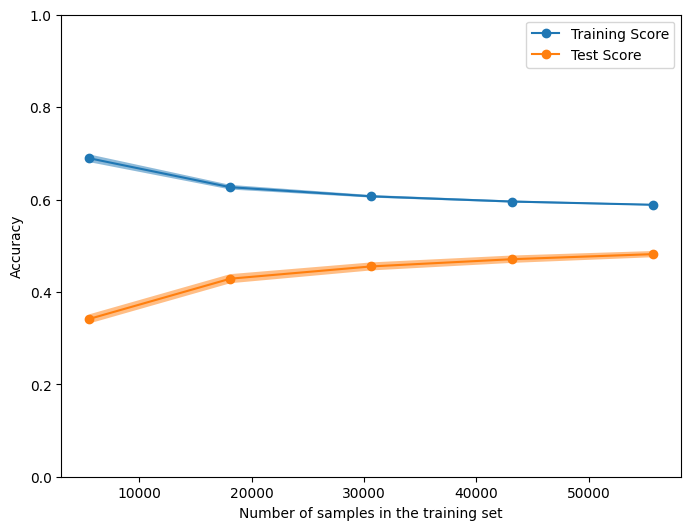

In [23]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(figsize=(8, 6), sharey=True)

pipeline = create_pipeline()
pipeline.set_params(**search.best_params_)

LearningCurveDisplay.from_estimator(
    estimator=pipeline,
    X=train_data[features],
    y=train_data[label],
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    score_type="both",
    line_kw=dict(marker="o"),
    std_display_style="fill_between",
    score_name="Accuracy",
    ax=ax,
)

handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_ylim(ymin=0, ymax=1)